Analysis Plan
## Mariam Sedrakyan
### Hypotheses: How have two music tastes In America changed last 20years based on "danceability" and "speechless"?¶

Music is a universal language that allows artists to express their feelings and thoughts. Music has been an essential part of human existence since time immemorial. The motivation of my project is to compare and contrast to understand how music tastes have changed in the last 20 or more years in America. Music taste is an adynamic and ever-evolving aspect representing individuals based on their experience. Life is a series of experiences, and these experiences often become intertwined with specific songs or genres. A song associated with a memorable event, a period of growth, or a significant relationship can evoke powerful emotions.

My final project is about how music taste changed in America, what specific features of tracks changed, and how they affected the popularity of the music. For my data resource, I used Spotify API. It is very reliable data because what is collected is based on people's behaviors and preferences. With the Spotify app, I got audio features for tracks. This helped me to understand tracks detailed based on their "danceability," "instrumentals," "speechiness," "tempo," and act. I picked to dive into "danceability" and "speechiness" because, based on my previous reports,I found out that with higher "danceability," there is a higher chance that people will love it. I also chose "speechiness" because I often hear from my parents and the older generation that "Songs back then had deeper lyrics and content; songs nowadays are just beaten with little words that have no meaning."

#### Speechiness 
__"Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks."__

#### Danceability
__Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.__

In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
import requests
import base64
import json
import urllib
import numpy as np



Below are the functions I used to get access tokens from Spotify's API. An access token is a string representing the authorization granted to the client. It is used in HTTP to prove the authenticity of the sender and receiver.

In [2]:
Client_ID = pd.read_csv("Spotify-Keys_9-23-21.txt")['Client_ID'].iloc[0]
Client_Secret = pd.read_csv("Spotify-Keys_secret.txt")['Client_Secret'].iloc[0]


Some of the information need to be hidden for confidentiality

In [3]:
# Client_ID
# Client_Secret

In [4]:
client_cred = base64.b64encode(str(Client_ID + ":" + Client_Secret).encode("ascii"))


In [5]:
# client_cred


In [6]:
headers = {"Authorization": "Basic {}".format(client_cred.decode("ascii"))}


In [7]:
# headers


I am getting the access to token to check the response



In [8]:
payload = {'grant_type' : 'client_credentials'}
url = 'https://accounts.spotify.com/api/token'

In [9]:
session_key_response = requests.post(url = url, data = payload, headers = headers)


In [10]:
session_key_response.status_code


200

In [11]:
# session_key_response.json()['access_token']


In [12]:
session_header_key = session_key_response.json()


In [13]:
key = session_header_key['access_token']


In [14]:
session_headers = {"Authorization": "Bearer {}".format(key)}


In [15]:
# session_headers


# Part 1:Hits of early 2000s
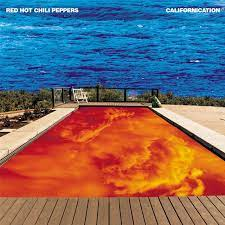
In order to satisfy my goals, I did research to find out the most popular tracks of the early 2000s. After that, I found a playlist with all the popular tracks realized during the early 2000s. This data will give me a base to start working on my next steps.

Playlist ID

In [16]:
early_hits_id="37i9dQZF1DWUZv12GM5cFk"


In order to get the diteils from my playslist I took the playlist __ID__ and joint it with __get_playlists__ endpoint. 



In [17]:
early_hits_url= 'https://api.spotify.com/v1/playlists/{}'.format(early_hits_id)


In [18]:
early_hits_response = requests.get(url = early_hits_url, headers = session_headers)
early_hits_response.status_code

200

In order to create a dataframe I had to convert my data into .json() file

In [19]:
early_hits = early_hits_response.json()


My next step was to visualize the information about my playlist. I used pd.DataFrame and pulled out "tracks," which were located inside "tracks," and "tracks" were hidden inside "items."

My first data frame represents a couple of essential pieces of information about the tracks in the playlist. I separated the most helpful parts. As we can see, the data frame is sorted from the most popular to the least popular songs. One hundred being very popular and 0 being least popular, our result shows that "Oops!... I Did it again" by Britney Spears is the most popular song in the playlist with an 81 score.

In [20]:
early_hits_df = pd.DataFrame([x['track'] for x in early_hits['tracks']['items']])
id_name_popularity_df =early_hits_df[['name','popularity','id','type']]
id_name_popularity_df.head(5)

,name,popularity,id,type
0,Oops!...I Did It Again,81,6naxalmIoLFWR0siv8dnQQ,track
1,All The Small Things,84,2m1hi0nfMR9vdGC8UcrnwU,track
2,Breathe,68,3y4LxiYMgDl4RethdzpmNe,track
3,It's My Life,82,0v1XpBHnsbkCn7iJ9Ucr1l,track
4,Bye Bye Bye,74,62bOmKYxYg7dhrC6gH9vFn,track


My next step was to visualize the data of the songs to show that the tracks were, in fact, released in the early 2000s. In order to get __released_data__ I needed to dig in into albums that were located inside "track." There was much different information. However, I only separated __released_data__  column. 
This is when I started to face some challenges. The __ID__ in the DataFrame is the ID of albums, and inside the album, every 0th track is the track from the original playlist. Another difference we can see that indicates that these are album information is the type column changed from "track" to "album" once I pulled out "release_date." However, because of the short time, I decided to work with my existing data to compare two albums. Later on, I plan to work on my date and figure out how to find a solution.


I sorted the  __realese_date__ values to increase from the oldest to the newest album to see what the top 5 albums were realized.

In [21]:
release_dates = pd.DataFrame([x['track']['album']for x in early_hits['tracks']['items']])
album_dates_df=release_dates[['name','release_date','id','type']]
album_dates_df.head(5).sort_values('release_date',ascending = True)

,name,release_date,id,type
1,Enema Of The State,1999-06-01,652N05EcNH1a4bIlUixQE2,album
2,Breathe,1999-11-09,3BGPil8BDPVoDK0lnUPtvb,album
3,Crush,2000-01-01,0Q9SljCrM0CL0bR23MuP69,album
4,No Strings Attached,2000-03-21,20RMokVwJ2wjQ0s8FOdOFC,album
0,Oops!... I Did It Again,2000-05-16,5PmgtkodFl2Om3hMXONDll,album


My next step is to join all the album's __ID__ and format it with __get_albums__ endpoint to get more information about albums. By joining the album IDs, I can increase the album's popularity. Now, instead of just knowing the track's popularity, I will get the album's popularity.

In [22]:
get_old_albums_url = 'https://api.spotify.com/v1/albums?ids={}'\
.format(','.join(list(album_dates_df['id'] [0:20])))

In [23]:
old_album_features =requests.get(url = get_old_albums_url , headers = session_headers)
old_album_features.status_code

200

In [24]:
old_album_response = old_album_features.json()


In [25]:
old_album_response_df = pd.DataFrame(old_album_response['albums'])


I need to find the most popular album from the early 2000s to move forward. Below, we can see album name popularity, with 100 being the most popular and 0 being the least popular, ID, and type. My goal is to find an album that is released relatively early and is very popular. This means I will not take the "Parachutes" because it is the most popular. I aim to find the 'golden mean' between popularity and date.  

I also want to explain why I dropped the "Sing When You're Winning" album because after visualizing the graph, I realized that this is the only album that was realized after 2010, which does not satisfy my analysis's requirements. So I have to go back and drop that row of the album.

In [26]:
old_albums_popularity_df = pd.DataFrame(old_album_response_df[['name', 'popularity', 'release_date', 'id', 'type']])
old_albums_popularity_df = old_albums_popularity_df.sort_values('popularity', ascending=False)
old_albums_popularity_df = old_albums_popularity_df[old_albums_popularity_df['name'] != "Sing When You're Winning"]
old_albums_popularity_df.head(5)

,name,popularity,release_date,id,type
9,Parachutes,87,2000-07-10,6ZG5lRT77aJ3btmArcykra,album
10,Hybrid Theory (Bonus Edition),86,2000-10-24,6hPkbAV3ZXpGZBGUvL6jVM,album
6,The Marshall Mathers LP,86,2000-05-23,6t7956yu5zYf5A829XRiHC,album
11,Californication (Deluxe Edition),85,1999-06-08,2Y9IRtehByVkegoD7TcLfi,album
13,2001,84,1999-11-16,7q2B4M5EiBkqrlsNW8lB7N,album


Timestamp is the date and time of occurrence of an event. Using timestamps allowed me to get the more specific date of the event. This also automatically organized my data from the oldest to the newest releases 

In [27]:
old_albums_popularity_df['timestamp'] = [pd.Timestamp(x) for x in old_albums_popularity_df['release_date']]


My first graph represents timestamp vs. popularity. Based on the release date, this graph shows us the most popular album. The graph is spread out. However, we can see that the least popular album is >60. The most famous albums were released during 2000-07 with 87/100 scores. The average volume of popularity is somewhere between 70-75.


Based on this graph, I decided to separate the four albums with the most popularity and pick the oldest one that was released. My top four were "Parachutes," "Hybrid Theory (Bonus Edition)," "Californication (Deluxe Edition)," and "Californication (Deluxe Edition)," I used scatter ply to make it easier to see the difference between albums.

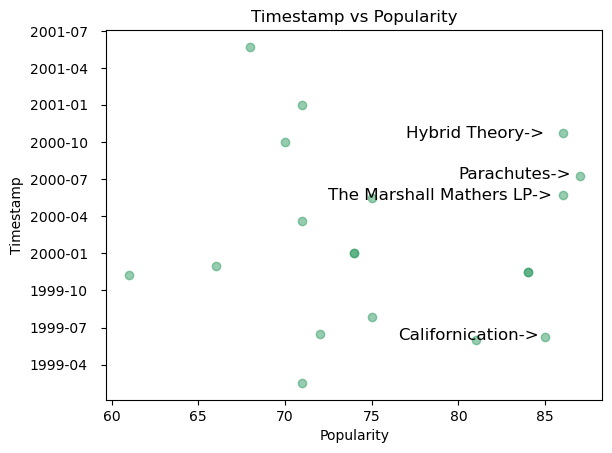

In [28]:
fig1, ax1 = plt.subplots()
ax1.scatter( old_albums_popularity_df['popularity'],old_albums_popularity_df['timestamp'],  label='popularity',alpha= .5, color ="#2F9B61",)
ax1.set_title('Timestamp vs Popularity')
ax1.set_xlabel('Popularity')
ax1.set_ylabel('Timestamp')

help_x = 80
help_y = pd.to_datetime('2000-07-01')
ax1.text(help_x, help_y, 'Parachutes->', fontsize=12, color='#000000')

help1_x = 72.5
help1_y = pd.to_datetime('2000-05-11')
ax1.text(help1_x, help1_y, 'The Marshall Mathers LP->', fontsize=12, color='#000000')

help2_x = 76.5
help2_y = pd.to_datetime('1999-06-01')
ax1.text(help2_x, help2_y, 'Californication->', fontsize=12, color='#000000')

help3_x = 77
help3_y = pd.to_datetime('2000-10-12')
ax1.text(help3_x, help3_y, 'Hybrid Theory->', fontsize=12, color='#000000')
ax1.tick_params(axis='y', which='both', pad=10)


plt.show()

Based on my graph above, I picked "Californication," which has a popularity of 85 and a release date of 1999-06-08. 

## Background about Californication album 

Californication is the Red Hot Chili Peppers's seventh studio album. It was released in June 8, 1999, by Warner Bros. Records and was produced by Rick Rubin. It was the first album with John Frusciante after returning to the band in 1998. This was an important album for the band, as it featured a more melodic and softer pop sound than their

California ID

In [29]:
california_id="2Y9IRtehByVkegoD7TcLfi"


I formatted the album ID with __get albums tracks__ endpoint to get track information about my chosen album. At this analysis stage, I had already narrowed my options to focus on my question. 

In [30]:
california_tracks_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(california_id)


In [31]:

california_album_response = requests.get(url = california_tracks_url, headers = session_headers)
california_album_response.status_code

200

First step of creating the DataFrame hat to transfer my data into json() file

In [32]:
california_of_the_state = california_album_response.json()


I had to look closely inside the "items" to get the essential information I needed from each track. This allowed me to find the "name," "ID," and "type" to show that we are working with tracks.

In [33]:
california_df = pd.DataFrame(california_of_the_state['items'])
california_name_df= pd.DataFrame(california_df [['name','id','type']])
california_name_df.head()

,name,id,type
0,Around the World,0aGQHMr7bc23Y9Ts84ffop,track
1,Parallel Universe,1Se0r96r0gnqg67kJPmESc,track
2,Scar Tissue,1G391cbiT3v3Cywg8T7DM1,track
3,Otherside,64BbK9SFKH2jk86U3dGj2P,track
4,Get on Top,0GcWf1Cc4ixN35D3O9VdcP,track


My next step is to join all the track IDs and format them with __audio_features__ endpoint. This will give me precise details about the audio. In other words, this shows the track's skeleton that shows all the track's different features.

In [34]:
california_audio_features = 'https://api.spotify.com/v1/audio-features?ids={}'\
.format(','.join(list(california_df['id'])))

In [35]:
california_features_response = requests.get(url = california_audio_features , headers = session_headers)
california_features_response.status_code

200

In [36]:
california_features = california_features_response.json()

After joining the IDs of the tracks, I separated the "danceability" and "speechiness" of the tracks. These are the two features I would like to use to compare the two albums. As I described above, based on my previous report, I learned that dance songs are more popular among listeners. Also picked "speechiness" to learn based on Values above 0.66, describe tracks probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain music and speech if music from the early 2000s is mostly word or beat, and how that changed over time.



In [37]:
california_features_df = pd.DataFrame(california_features['audio_features'])
california_two_features_df= pd.DataFrame(california_features_df[['danceability','speechiness','id']])
california_two_features_df.head()

,danceability,speechiness,id
0,0.504,0.1830,0aGQHMr7bc23Y9Ts84ffop
1,0.343,0.2120,1Se0r96r0gnqg67kJPmESc
2,0.595,0.0295,1G391cbiT3v3Cywg8T7DM1
3,0.458,0.0574,64BbK9SFKH2jk86U3dGj2P
4,0.573,0.3420,0GcWf1Cc4ixN35D3O9VdcP


Next, I used "ID" as a common point to merge my two graphs and present the final data frame with all the information I needed to answer my question.

In [38]:
california_final_df= pd.merge(california_name_df, california_two_features_df, how = 'inner', on = 'id')
california_final_df.head()

,name,id,type,danceability,speechiness
0,Around the World,0aGQHMr7bc23Y9Ts84ffop,track,0.504,0.1830
1,Parallel Universe,1Se0r96r0gnqg67kJPmESc,track,0.343,0.2120
2,Scar Tissue,1G391cbiT3v3Cywg8T7DM1,track,0.595,0.0295
3,Otherside,64BbK9SFKH2jk86U3dGj2P,track,0.458,0.0574
4,Get on Top,0GcWf1Cc4ixN35D3O9VdcP,track,0.573,0.3420


My following graph represents the Californication album's danceability vs speechiness. As we can see, my picked album has low "speechiness," which indicates that the tracks of the Californication are mostly made with the beat, and there is little to no text. The artist decided to express the album's motivation and message mainly through audio. It also has only one song with a speech level of 0.35; however, based on Spotify's definition of "speechiness," values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.

The danceability is spread out, going from the lowest around 0.1 and the highest danceable song to 0.75. The middle is around 0.5, which makes the album average danceable. We can also see that the two songs overlap around 0.59.

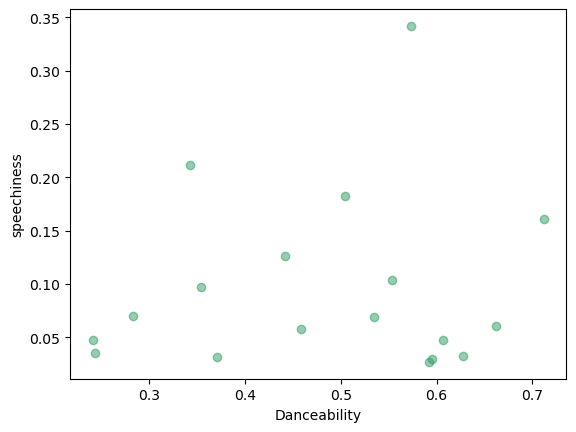

In [39]:
fig4, ax4 =  plt.subplots()
ax4.scatter( x = california_final_df ['danceability'], 
             y = california_final_df['speechiness'],alpha= .5, color ="#2F9B61" )

ax4.set_xlabel('Danceability')
ax4.set_ylabel('speechiness')
plt.show()

This is the second part of my report. Previously, I started my report with a playlist from the early 2000s; now, I will pick a playlist with the most popular tracks from 2022. The overall process during this part is similar and almost the same as part one of my report. 



# Part 2: Hits of 2022
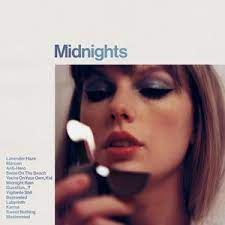

In order to get the playlist that satisfies my requirements to answer my question, I had to start with research. I discovered that 2022 was full of viral and trendy songs during this research. It was tough to pick one playlist.

In [40]:
new_id= "56r5qRUv3jSxADdmBkhcz7"

To get the playlist, I formated the ID of the playlist with __get_playlist__ endpoint. This endpoint returns information about tracks inside the playlist

In [41]:
new_playlist_url = 'https://api.spotify.com/v1/playlists/{}'.format(new_id)


In [42]:
new_playlist_url_response = requests.get(url = new_playlist_url, headers = session_headers)


In order to create DataFrame I need json()file 

In [43]:
new_playlist_url_data=new_playlist_url_response.json()

Below are all the values that get the playlist endpoint returned. As we learned already, Spotify API does not give the track date. It gives the date the album was released, with the track in it. In order to get released_data, I needed to dig into the album that was located inside the "track."This will show that all the albums are released from 2020 to 2022.  

In [44]:
new_playlist_url_data.keys()

dict_keys(['collaborative', 'description', 'external_urls', 'followers', 'href', 'id', 'images', 'name', 'owner', 'primary_color', 'public', 'snapshot_id', 'tracks', 'type', 'uri'])

Below, we can see album release dates sorted from the newest to the oldest album. For Part One, I picked the oldest album, which is why my value increased, and now I need to pick the newer album, so my value decreased. As we can see, the "type" is an album. This is another piece of evidence that we are working with albums now.

In [45]:
new_release_dates = pd.DataFrame([x['track']['album']for x in new_playlist_url_data['tracks']['items']])
new_albums_dates= pd.DataFrame (new_release_dates[['name','release_date','id','type']])
new_albums_dates.head(5).sort_values('release_date',ascending = False)

,name,release_date,id,type
1,Midnights,2022-10-21,151w1FgRZfnKZA9FEcg9Z3,album
3,Unholy (feat. Kim Petras),2022-09-22,0gX9tkL5njRax8ymWcXARi,album
4,Un Verano Sin Ti,2022-05-06,3RQQmkQEvNCY4prGKE6oc5,album
0,As It Was,2022-03-31,2pqdSWeJVsXAhHFuVLzuA8,album
2,Dreamland (+ Bonus Levels),2020-08-06,0KTj6k94XZh0c6IEMfxeWV,album


Now its time to find out what album I will pick for my future analysis. In order to increase the popularity of the albums, I joined "IDs" of albums and formed it with the __get_albums__ endpoint.

In [46]:
get_new_albums_url = 'https://api.spotify.com/v1/albums?ids={}'\
.format(','.join(list(new_albums_dates['id'] [0:20])))

In [47]:
new_album_features =requests.get(url = get_new_albums_url , headers = session_headers)
new_album_features.status_code

200

Again I need json() file to create df

In [48]:
new_album_response = new_album_features.json()

In order to get the popularity of the popularity and release date, I looked closely into "albums."This data frame is sorted from most popular to least popular. From the top 3, I will pick the album that is somewhat popular and is a newer album.

In [49]:
new_album_response_df = pd.DataFrame(new_album_response['albums'])
new_albums_popularity_df= pd.DataFrame (new_album_response_df[['name','popularity','release_date','id','type']])
new_albums_popularity_df.head(6).sort_values('popularity',ascending = False)

,name,popularity,release_date,id,type
4,Un Verano Sin Ti,95,2022-05-06,3RQQmkQEvNCY4prGKE6oc5,album
1,Midnights,93,2022-10-21,151w1FgRZfnKZA9FEcg9Z3,album
5,RENAISSANCE,86,2022-07-29,6FJxoadUE4JNVwWHghBwnb,album
3,Unholy (feat. Kim Petras),75,2022-09-22,0gX9tkL5njRax8ymWcXARi,album
0,As It Was,48,2022-03-31,2pqdSWeJVsXAhHFuVLzuA8,album
2,Dreamland (+ Bonus Levels),17,2020-08-06,0KTj6k94XZh0c6IEMfxeWV,album


In [50]:
new_albums_popularity_df['timestamp'] = pd.to_datetime(new_albums_popularity_df['release_date'])

As we can see, the albums from 2020 to 2022 are top-rated, with only two albums with a popularity >20. The most famous albums were released from mid-2022 to early 2023, with a popularity rate between 65 to 90. As a reminder, 100 is the most popular, and 0 is the least popular. There is also some overlapping between albums with the same popularity.

Based on this graph, I decided to separate the three albums with the most popularity and pick the oldest one that was released. My top three albums were "Un Verano Sin Ti," "Midnights," and "RENAISSANCE." I used a scatter plt() to make it easier to see the difference between albums.

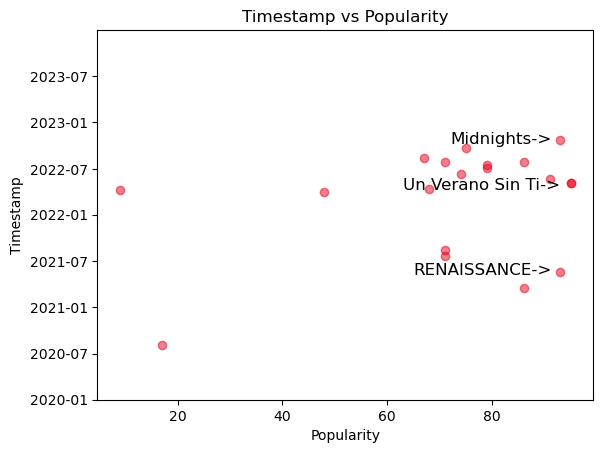

In [51]:
fig2, ax2 = plt.subplots()
ax2.scatter(new_albums_popularity_df['popularity'], new_albums_popularity_df['timestamp'], label='popularity',alpha= .5, color='#E3001E',)
ax2.set_ylim(pd.Timestamp('2020-01-01'), pd.Timestamp('2023-12-31'))
ax2.set_title('Timestamp vs Popularity')
ax2.set_ylabel('Timestamp')
ax2.set_xlabel('Popularity')

name_x = 63
name_y = pd.to_datetime('2022-04-08')
ax2.text(name_x, name_y, 'Un Verano Sin Ti->', fontsize=12, color='#000000')

name1_x = 72
name1_y = pd.to_datetime('2022-10-08')
ax2.text(name1_x, name1_y, 'Midnights->', fontsize=12, color='#000000')

name2_x = 65
name2_y = pd.to_datetime('2021-05-08')
ax2.text(name2_x, name2_y, 'RENAISSANCE->', fontsize=12, color='#000000')

plt.show()

It was hard to pick one album because I listen to them daily. The most popular song released mid 2022 was "Midnights" by Taylor Swift, with 93/100 popularity. 

### Background of Midnights
When Taylor Swift announced the release of her highly anticipated tenth album, Midnights, in August, she called it the story of “13 sleepless nights scattered throughout my life.” The songs, written during those wee hours in the night when Swift should have been asleep, resulted in a collection that she says is “a journey through terrors and sweet dreams.” 

In [52]:
new_album_id = "151w1FgRZfnKZA9FEcg9Z3"

To get the diteils about tracks in the album used __get album tracks__ endpoint and formated with album's ID

In [53]:
mid_album_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(new_album_id)


In [54]:
mid_album_response = requests.get(url = mid_album_url, headers = session_headers)
mid_album_response.status_code

200

In [55]:
mid_of_the_state = mid_album_response.json()

Getting into "items" I pulled our the besic information about tracks, like "name", "id" and "type"

In [56]:
mid_df = pd.DataFrame(mid_of_the_state['items'])
mid_name_df= pd.DataFrame(mid_df [['name','id','type', ]])
mid_name_df.head()

,name,id,type
0,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC,track
1,Maroon,3eX0NZfLtGzoLUxPNvRfqm,track
2,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,track
3,Snow On The Beach (feat. Lana Del Rey),1wtOxkiel43cVs0Yux5Q4h,track
4,"You're On Your Own, Kid",4D7BCuvgdJlYvlX5WlN54t,track


My next step is to combine the track's IDs and get the details about their structure. I used audio_features endpoint to get information, and I joined the ids.

In [57]:
mid_audio_features = 'https://api.spotify.com/v1/audio-features?ids={}'\
.format(','.join(list(mid_df['id'])))

In [58]:
mid_features_response = requests.get(url = mid_audio_features , headers = session_headers)
mid_features_response.status_code

200

In [59]:
mid_features = mid_features_response.json()

In [60]:
mid_features_df = pd.DataFrame(mid_features['audio_features'])
mid_two_features_df= pd.DataFrame(mid_features_df[['danceability','speechiness','id']])
mid_two_features_df.head()

,danceability,speechiness,id
0,0.733,0.0800,5jQI2r1RdgtuT8S3iG8zFC
1,0.637,0.0564,3eX0NZfLtGzoLUxPNvRfqm
2,0.637,0.0519,0V3wPSX9ygBnCm8psDIegu
3,0.663,0.0375,1wtOxkiel43cVs0Yux5Q4h
4,0.696,0.0656,4D7BCuvgdJlYvlX5WlN54t


From my final data frame for "Midnights," we can get a vague idea about danceableility and speechiness of the tracks. I will use This final data frame to compare to albums. Later, I will use visualization to understand the relationship better.

I used the "ID" ad value that both data frames share and merged them together to get one data frame with all the essential information

In [61]:
mid_final_df= pd.merge(mid_name_df, mid_two_features_df, how = 'inner', on = 'id')
mid_final_df.head(5)

,name,id,type,danceability,speechiness
0,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC,track,0.733,0.0800
1,Maroon,3eX0NZfLtGzoLUxPNvRfqm,track,0.637,0.0564
2,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,track,0.637,0.0519
3,Snow On The Beach (feat. Lana Del Rey),1wtOxkiel43cVs0Yux5Q4h,track,0.663,0.0375
4,"You're On Your Own, Kid",4D7BCuvgdJlYvlX5WlN54t,track,0.696,0.0656


I used a Scatter plot to visualize the relationship between Speechiness vs. danceability. As suspected, the album has most songs with low "Speechiness" and only one that is below average, about> 0.40. However, the majority of songs are very danceable. Average danceability is about 0.65 to 0.7, which is above average. There is only one song with high danceability and high speechiness.



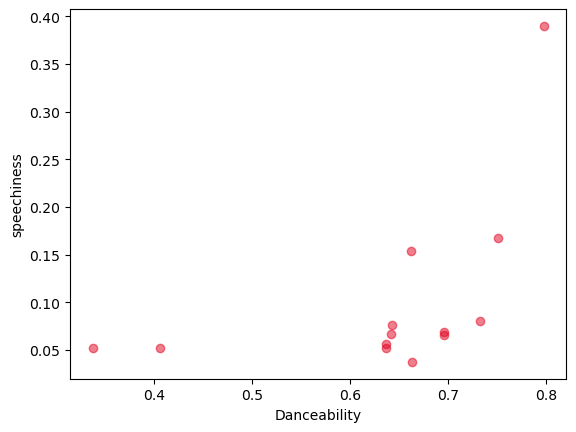

In [62]:
fig3, ax3 =  plt.subplots()
ax3.scatter( x = mid_final_df ['danceability'], 
             y = mid_final_df['speechiness'],alpha= .5, color='#E3001E' ) 

ax3.set_xlabel('Danceability')
ax3.set_ylabel('speechiness')
plt.show()


I used a scatter plot to better show the relationship between the two albums. The graph represents two albums together based on their danceability vs. speechiness. We can see a similar pattern in terms of "speechiness." Only a few songs have relatively high "speechiness," and the rate is> 0.40. However, we can notice that the "Midnight" album has lower speechiness than the "California" album. For Midnight, there are only two songs below 0.45. The "California" album is more spread; however, danceability is >0.73

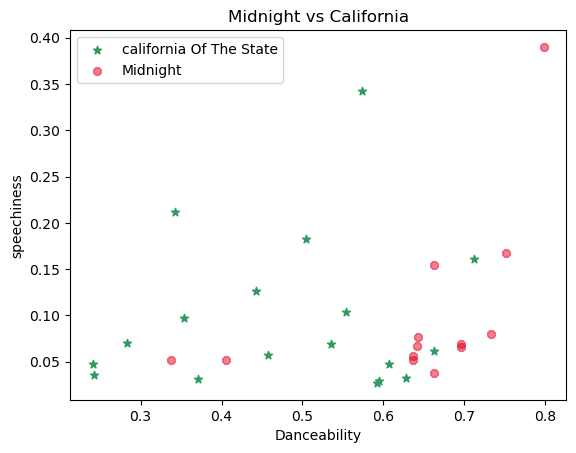

In [63]:
fig5, ax5 =  plt.subplots()
ax5.scatter( x = california_final_df  ['danceability'], 
             y = california_final_df ['speechiness'],
            label = 'california Of The State',
            color = '#2F9B61',
            marker ='*')
ax5.scatter( x = mid_final_df ['danceability'], 
             y = mid_final_df  ['speechiness'],
            label = 'Midnight',
            alpha= .5, 
            marker ='8',
           color = '#E3001E')

ax5.set_title('Midnight vs California')
ax5.set_xlabel('Danceability')
ax5.set_ylabel('speechiness')
ax5.legend()

plt.show()

Also, I compared the features of the two albums separately to get a clearer view of the relationship. As we can see, the "danceability" between the two albums is dramatically different. "Midnight" is mostly popular, and "Californa" is spread out between 0.1 to 0.75. The mid for "midnight" is 0.68, and for "California," 0.55

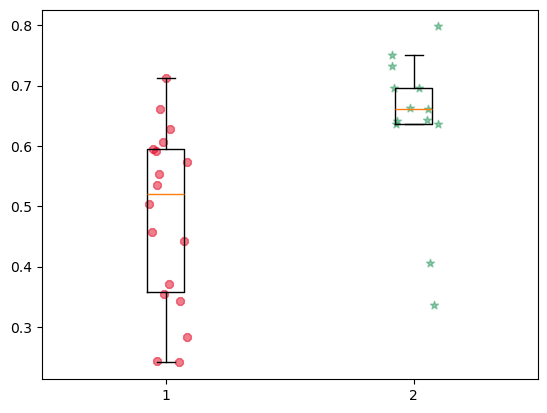

In [64]:
california_speech= california_final_df   ['danceability']
mid_speech = mid_final_df['danceability']

california_ax = [1]*len(california_speech)
mid_ax = [2]*len(mid_speech )

bur_x_jitter = np.random.uniform(-0.10,0.10,len (california_ax))
chr_x_jitter = np.random.uniform(-0.10,0.10,len (mid_ax))

fig8, ax8=  plt.subplots()
ax8.boxplot(california_speech,positions= [1], showfliers=False)
ax8.boxplot(mid_speech,positions= [2], showfliers=False)
ax8.scatter(california_ax + bur_x_jitter, california_speech, alpha=0.5, color='#E3001E', marker ='8')
ax8.scatter(mid_ax + chr_x_jitter, mid_speech, alpha=0.5, color='#2F9B61',marker ='*')


ax5.legend()
plt.show()

My last graph compares the Spechiness of both albums using a boxplot. This will allow me to get to the midpoint of the values. The graph shows that they both share almost the exact midpoint of 0.06. Both artists have little to no lyrics in those tracks, and the songs are heavily based on audio. There is one song from each playlist that has somewhat high sketchiness. However, it is still below the average rate.

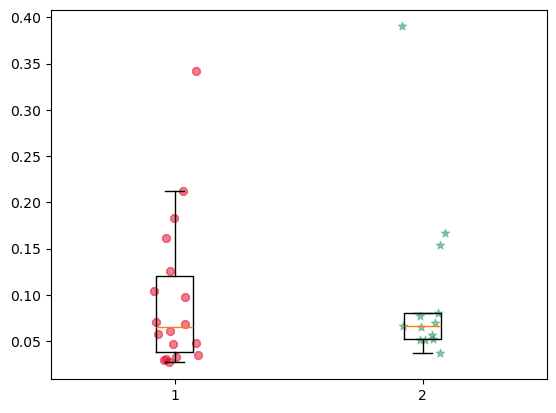

In [65]:
california_speech= california_final_df   ['speechiness']
mid_speech = mid_final_df['speechiness']

california_ax = [1]*len(california_speech)
mid_ax = [2]*len(mid_speech )

bur_x_jitter = np.random.uniform(-0.10,0.10,len (california_ax))
chr_x_jitter = np.random.uniform(-0.10,0.10,len (mid_ax))

fig8, ax8=  plt.subplots()
ax8.boxplot(california_speech,positions= [1], showfliers=False)
ax8.boxplot(mid_speech,positions= [2], showfliers=False)
ax8.scatter(california_ax + bur_x_jitter, california_speech, alpha=0.5, color='#E3001E', marker ='8', label='Aguilera')
ax8.scatter(mid_ax + chr_x_jitter, mid_speech, alpha=0.5, color='#2F9B61',marker ='*', label='Sia')
plt.show()


# Conclution

For my final project, I decided to compare and contrast how music changed in America over 20 years based on "Danceability" and "speechiness" of the two popular albums, one released early 2000s and the other in mid 2022. My research and report showed me that dances became dramatically more danceable over time. During the early 2000s, the average rate of danceability based on an album called "Californication" was 0.52, which is in the middle of the danceability scale; however, the "Midnight" album that was released in mid-2022 has average danceability of 0.69, which is above average. On the other hand, both albums share the exact midpoint for "Speechiness" with a rate of 0.06. This is very low, meaning there must be more about lyrics in the tracks. This can include two things. One, the artist mostly expressed their feeling and goals through audio, or both albums could be more meaningful to have many lyrics. To get the answer to this question, I listened to both albums with all the tracks. I agree that words are not the only way to express emotions. Both artists did a fantastic job creating songs where the songs' melodies express the meaning. 

### limitations
1. it is hard to assume by comparing only two features that describe the tracks. I picked "danceability" because, from my previous analysis throughout the semester, I learned that the more danceable the song is, the more popular it is, and for my analysis, I wanted to compare albums that were hit during the realized year. I also picked "speechiness" because there are a lot of stereotypes that nowadays have no meaning and proper lyrics. Artists repeat the same thing or play some beats instead of singing. However, these more than two features are needed to make a perfect conclusion about the overall picture. Later, to make the analysis more accurate, I would like to add more features to the data to compare and contrast more features. 
2. Realise date. I faced a challenge when I was trying to get the realized data for my tracks from the picked playlist. However, instead of giving me the release date of the stack, Spotify API gave me the release date of the album the track was in. This limited my window into comparing to albums rather than playlists. In the future, I would like to collect released data specifically for tracks by either doing it manually or learning new ways to fix this problem.
3. Spotify. Spotify was founded around 2006, so the albums from the early 2000s and late 1999s were not in Spotify when they came out. In the first part, when I had to pick the most popular song and then the album of the early 2000s, the data was mostly collected from people born after the 2000s.

### Next Step 
For my next step, I would like to create my data where I can collect all the popular tracks from the early 2000s and late hits of 2022 from different sources to get the exact released date and more features about tracks that will help me draw more accurate conclusions about how music teste changed over time in America. 